# KNN Regression Model

### Sam Fradkin 

## 1) Original KNN Regression Model from Thinkful

In [42]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 205, 110, 307, 110, 397,
                     153, 190, 192, 210, 403, 164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 20, 10, 17, 51, 7,
                     13, 19, 12, 21, 22, 16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60, 70, 105, 95, 70, 90,
                105, 70, 75, 102, 100, 100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [44]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
duration    30 non-null int64
loudness    30 non-null int64
bpm         30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


### Unweighted Neighbors

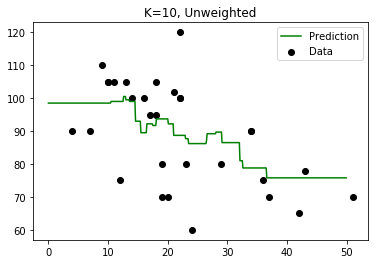

In [45]:
from sklearn import neighbors

# Build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

#Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are common convention for predictions
Y_ = knn.predict(T)
plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

### Weighted Neighbors

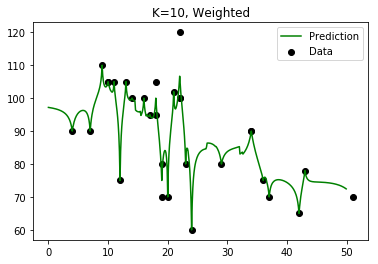

In [46]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='Data')
plt.plot(T, Y_, c='g', label='Prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

### Accuracy Scores

In [20]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy:   %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy:   0.11 (+/- 0.94)


## 2) Adding Features to KNN Regression Model

### Unweighted Neighbors

In [71]:
# Build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = music[['loudness', 'duration']]
Y = music.bpm
knn.fit(X, Y)

#Set up our prediction line
T = np.c_[np.random.randint(0,50,50), np.random.randint(100,400,50)]

Y_ = knn_w.predict(T)

### Weighted Neighbors

In [72]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = music[['loudness', 'duration']]
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.c_[np.random.randint(0,50,50), np.random.randint(100,400,50)]

Y_ = knn_w.predict(T)

### Accuracy Scores

In [73]:
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy:   %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.42 (+/- 0.78)
Weighted Accuracy:   -0.26 (+/- 0.74)


### Fooling around with other tools

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(music[['loudness', 'duration']], music['bpm'], test_size=0.3)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [35]:
rmse_val = [] # to store RMSE value outcomes for different k variables

for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for k = ', K, 'is: ', error)

RMSE value for k =  1 is:  19.0
RMSE value for k =  2 is:  18.892973414591058
RMSE value for k =  3 is:  18.55089761896
RMSE value for k =  4 is:  17.233687939614086
RMSE value for k =  5 is:  18.713512646094948
RMSE value for k =  6 is:  15.837426371543895
RMSE value for k =  7 is:  15.303283183371999
RMSE value for k =  8 is:  15.298420397762204
RMSE value for k =  9 is:  15.442490328460032
RMSE value for k =  10 is:  15.894128895077367
RMSE value for k =  11 is:  15.636774718580321
RMSE value for k =  12 is:  15.369848830955355
RMSE value for k =  13 is:  15.836649709779
RMSE value for k =  14 is:  15.950763955005394
RMSE value for k =  15 is:  16.40633722786923
RMSE value for k =  16 is:  16.596519046006136
RMSE value for k =  17 is:  16.611859134320294
RMSE value for k =  18 is:  16.80723642242002
RMSE value for k =  19 is:  17.1362202999393
RMSE value for k =  20 is:  17.178143412811266


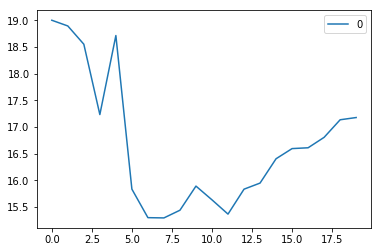

In [36]:
curve = pd.DataFrame(rmse_val)
curve.plot()
plt.show()

In [31]:
# Build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# Trailing underscores are common convention for predictions
y_pred = knn.predict(X_test)